In [3]:
import pandas as pd
import numpy as np

In [4]:
sub = pd.read_csv('./data/new_submission.csv')

In [5]:
pred1 = pd.read_csv('pred/lstm_model_pred.csv')
pred2 = pd.read_csv('pred/transfomer_model_pred.csv')
pred3 = pd.read_csv('pred/cnn_model_pred.csv')
pred4 = pd.read_csv('pred/stacked_lstm_model_pred.csv')
pred5 = pd.read_csv('pred/pred_koelectra.csv')

In [6]:
label_encode = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4
}

In [7]:
pred1['label'] = pred1['class'].map(label_encode)
pred2['label'] = pred2['class'].map(label_encode)
pred3['label'] = pred3['class'].map(label_encode)
pred4['label'] = pred3['class'].map(label_encode)
pred5['label'] = pred3['class'].map(label_encode)

In [8]:
pred6 = pd.read_csv('pred/n.csv')

In [9]:
sub['label1'] = pred1['label']
sub['label2'] = pred2['label']
sub['label3'] = pred3['label']
sub['label4'] = pred4['label']
sub['label5'] = pred5['label']

In [10]:
sub['label6'] = pred6['class'].astype('int')

In [11]:
pred7 = pd.read_csv('pred/pred_koelectra.csv')

In [12]:
pred8 = pd.read_csv('pred/pred_koelectra_add_data.csv')
pred9 = pd.read_csv('pred/pred_koelectra_add_data2.csv')

In [13]:
pred7['일반 대화'] = 1 - pred7['max_val']

In [14]:
pred8['일반 대화'] += 1 - pred8['max_val']

In [15]:
pred9['일반 대화'] += 1 - pred9['max_val']

In [16]:
pred5['일반 대화'] = 1 - pred5['max_val']
pred4['일반 대화'] = 1 - pred4.iloc[:,:4].max(axis=1)

In [71]:
pred4

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,label,class,일반 대화
0,0.974048,0.345223,0.362772,0.237041,1,갈취 대화,0.025952
1,0.067902,0.304401,0.968194,0.081628,2,직장 내 괴롭힘 대화,0.031806
2,0.121651,0.958459,0.361863,0.158774,2,기타 괴롭힘 대화,0.041541
3,0.100553,0.973983,0.260947,0.194558,3,기타 괴롭힘 대화,0.026017
4,0.227684,0.737720,0.208887,0.844744,3,협박 대화,0.155256
...,...,...,...,...,...,...,...
495,0.063159,0.311116,0.968740,0.080566,2,직장 내 괴롭힘 대화,0.031260
496,0.981989,0.271551,0.283838,0.345969,2,갈취 대화,0.018011
497,0.986924,0.291462,0.299756,0.283355,1,갈취 대화,0.013076
498,0.094984,0.370897,0.945455,0.100949,2,직장 내 괴롭힘 대화,0.054545


In [17]:
pred3['일반 대화'] = 1 - pred3.iloc[:,:4].max(axis=1)

In [18]:
pred2['일반 대화'] = 1 - pred2.iloc[:,:4].max(axis=1)

In [19]:
pred1['일반 대화'] = 1 - pred1.iloc[:,:4].max(axis=1)

In [21]:
la = label_encode.keys()

In [22]:
pred = pred1[la] + pred2[la] + pred3[la] + pred4[la] + pred5[la] + pred7[la] + pred8[la] + pred9[la]

In [23]:
pred = pred  / 8

In [24]:
pred

,협박 대화,갈취 대화,직장 내 괴롭힘 대화,기타 괴롭힘 대화,일반 대화
0,0.118434,0.943030,0.075275,0.222127,0.064480
1,0.103321,0.035326,0.939405,0.135275,0.066401
2,0.099263,0.056463,0.831618,0.341461,0.097222
3,0.267776,0.098042,0.167209,0.657102,0.332697
4,0.253694,0.257441,0.176348,0.642485,0.258642
...,...,...,...,...,...
495,0.135099,0.041672,0.962422,0.132844,0.043274
496,0.320144,0.371195,0.307770,0.225007,0.337152
497,0.101114,0.966223,0.056513,0.141410,0.041918
498,0.548052,0.047762,0.593660,0.106517,0.134607


<AxesSubplot: >

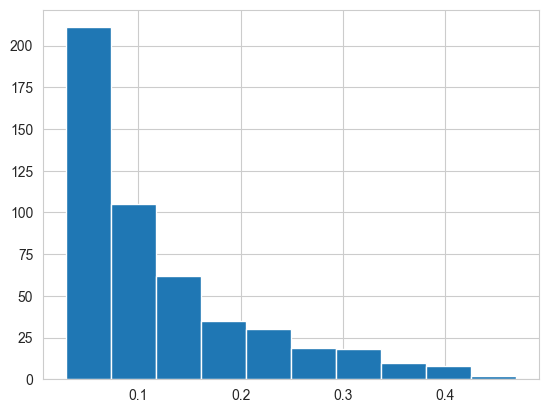

In [56]:
pred['일반 대화'].hist()

array([[<AxesSubplot: title={'center': '협박 대화'}>,
        <AxesSubplot: title={'center': '갈취 대화'}>],
       [<AxesSubplot: title={'center': '직장 내 괴롭힘 대화'}>,
        <AxesSubplot: title={'center': '기타 괴롭힘 대화'}>],
       [<AxesSubplot: title={'center': '일반 대화'}>, <AxesSubplot: >]],
      dtype=object)

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from curren

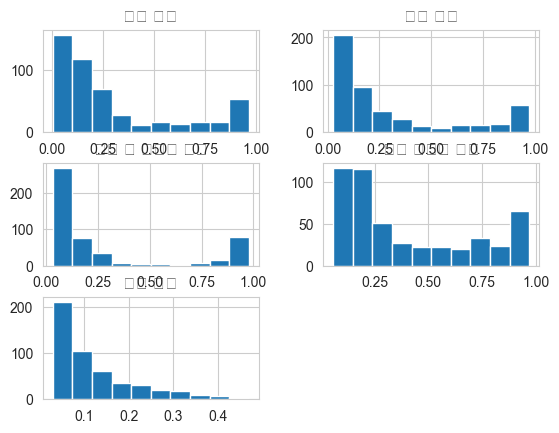

In [59]:
pred.iloc[:,:5].hist()

In [60]:
pred['일반 대화'] += 0.5

In [61]:
pred.iloc[:,:5]

,협박 대화,갈취 대화,직장 내 괴롭힘 대화,기타 괴롭힘 대화,일반 대화
0,0.118434,0.943030,0.075275,0.222127,0.564480
1,0.103321,0.035326,0.939405,0.135275,0.566401
2,0.099263,0.056463,0.831618,0.341461,0.597222
3,0.267776,0.098042,0.167209,0.657102,0.832697
4,0.253694,0.257441,0.176348,0.642485,0.758642
...,...,...,...,...,...
495,0.135099,0.041672,0.962422,0.132844,0.543274
496,0.320144,0.371195,0.307770,0.225007,0.837152
497,0.101114,0.966223,0.056513,0.141410,0.541918
498,0.548052,0.047762,0.593660,0.106517,0.634607


In [62]:
pred['new_class'] = pred.iloc[:,:5].apply(lambda x : pred.columns[np.argmax(x)], axis=1 )

In [63]:
pred['new_label'] = pred['new_class'].map(label_encode)

In [64]:
pred['new_label'].value_counts()

3    121
4    108
2    101
1     89
0     81
Name: new_label, dtype: int64

In [67]:
s = sub[['file_name']]

In [68]:
s['class'] = pred['new_label']

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_46141/3941493472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['class'] = pred['new_label']


In [70]:
s.to_csv('s.csv', index=False)

In [65]:
pred

,협박 대화,갈취 대화,직장 내 괴롭힘 대화,기타 괴롭힘 대화,일반 대화,class,label,new_class,new_label
0,0.118434,0.943030,0.075275,0.222127,0.564480,갈취 대화,1,갈취 대화,1
1,0.103321,0.035326,0.939405,0.135275,0.566401,직장 내 괴롭힘 대화,2,직장 내 괴롭힘 대화,2
2,0.099263,0.056463,0.831618,0.341461,0.597222,직장 내 괴롭힘 대화,2,직장 내 괴롭힘 대화,2
3,0.267776,0.098042,0.167209,0.657102,0.832697,기타 괴롭힘 대화,3,일반 대화,4
4,0.253694,0.257441,0.176348,0.642485,0.758642,기타 괴롭힘 대화,3,일반 대화,4
...,...,...,...,...,...,...,...,...,...
495,0.135099,0.041672,0.962422,0.132844,0.543274,직장 내 괴롭힘 대화,2,직장 내 괴롭힘 대화,2
496,0.320144,0.371195,0.307770,0.225007,0.837152,갈취 대화,1,일반 대화,4
497,0.101114,0.966223,0.056513,0.141410,0.541918,갈취 대화,1,갈취 대화,1
498,0.548052,0.047762,0.593660,0.106517,0.634607,직장 내 괴롭힘 대화,2,일반 대화,4


In [116]:
sub.iloc[:,2:].mode(axis=1)[0]

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
495    2.0
496    2.0
497    1.0
498    2.0
499    0.0
Name: 0, Length: 500, dtype: float64

In [117]:
sub.iloc[:,2:].mode(axis=1)[1].value_counts()

3.0    15
1.0     3
2.0     2
Name: 1, dtype: int64

In [118]:
pred7['new_label'] = pred7.label.map(label_encode)

In [119]:
pred8['new_label'] = pred8.label.map(label_encode)

In [120]:
pred9['new_label'] = pred8.new_label.map(label_encode)

In [121]:
sub['label7'] = pred7['new_label']
sub['label8'] = pred8['new_label']
sub['label9'] = pred9['new_label']

In [122]:
mode_df = sub.iloc[:,2:].mode(axis=1)

In [123]:
mode_df.fillna(-9999, inplace=True)

In [124]:
idx = mode_df[mode_df.sum(axis=1) >0].index

In [125]:
sub['class'] = sub['label6']*5 * 0.3 + sub['class']*5 * 0.7

In [126]:
sub['class'] = round(sub['class'] /5,0)

In [127]:
sub['class'].value_counts()

2.0    108
1.0    107
0.0    104
4.0    100
3.0     81
Name: class, dtype: int64

In [129]:
sub

,file_name,class,label1,label2,label3,label4,label5,label6,label7,label8,label9
0,t_000,1.0,1,1,1,1,1,1,1,1,NaN
1,t_001,2.0,2,2,2,2,2,2,2,2,NaN
2,t_002,2.0,2,2,2,2,2,2,2,2,NaN
3,t_003,4.0,3,0,3,3,3,4,3,4,NaN
4,t_004,3.0,3,1,3,3,3,3,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,t_495,2.0,2,2,2,2,2,2,2,2,NaN
496,t_496,2.0,0,0,2,2,2,2,2,1,NaN
497,t_497,1.0,1,1,1,1,1,1,1,1,NaN
498,t_498,2.0,2,0,2,2,2,2,0,2,NaN


In [128]:
sub['class'].to_csv('result2.csv', index=False)

In [104]:
n = pd.read_csv('pred/n.csv')

In [130]:
(n['class'] - sub['class']).value_counts()

0.0    500
Name: class, dtype: int64

In [90]:
sub.iloc[:,2:]

,label1,label2,label3,label4,label5,label6,label7,label8,label9
0,1,1,1,1,1,1,1,1,NaN
1,2,2,2,2,2,2,2,2,NaN
2,2,2,2,2,2,2,2,2,NaN
3,3,0,3,3,3,4,3,4,NaN
4,3,1,3,3,3,3,3,3,NaN
...,...,...,...,...,...,...,...,...,...
495,2,2,2,2,2,2,2,2,NaN
496,0,0,2,2,2,2,2,1,NaN
497,1,1,1,1,1,1,1,1,NaN
498,2,0,2,2,2,2,0,2,NaN


In [86]:
sub['class'] = mode_df[0]

In [87]:
sub.loc[idx, 'class'] = sub.loc[idx, 'label6']

In [88]:
sub['class'].value_counts()

3.0    157
2.0    125
1.0    121
0.0     88
4.0      9
Name: class, dtype: int64

In [51]:
# sub.loc[sub.label6 == 4,'class'] = 4

In [ ]:
sub.loc[idx, 'class'] = sub.loc[idx, 'label6']

In [52]:
sub['class'].value_counts()

2.0    106
1.0    105
4.0    100
3.0     98
0.0     91
Name: class, dtype: int64

In [55]:
sub[['file_name','class']].to_csv('ensemble.csv', index=False)

In [53]:
sub.to_csv('ensemble.csv', index=False)

In [57]:
pred2

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,label,class
0,9.993306e-01,9.525102e-06,1.897650e-09,6.598186e-04,1,갈취 대화
1,6.523092e-07,1.272439e-07,7.219449e-01,2.780544e-01,2,직장 내 괴롭힘 대화
2,1.985318e-07,3.504795e-04,9.138573e-01,8.579194e-02,2,직장 내 괴롭힘 대화
3,1.522736e-07,8.992138e-02,4.865326e-02,8.614252e-01,0,협박 대화
4,5.490840e-01,7.959677e-04,2.747060e-07,4.501198e-01,1,갈취 대화
...,...,...,...,...,...,...
495,4.108490e-06,2.007310e-08,9.065918e-01,9.340405e-02,2,직장 내 괴롭힘 대화
496,6.308750e-04,5.010112e-07,1.517656e-03,9.978510e-01,0,협박 대화
497,9.999987e-01,7.925712e-07,3.544197e-10,4.977359e-07,1,갈취 대화
498,4.023900e-07,1.062878e-05,1.012251e-03,9.989767e-01,0,협박 대화


In [58]:
pred3

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,label,class
0,0.987069,0.549820,1.706023e-02,0.278827,1,갈취 대화
1,0.011433,0.242695,9.991172e-01,0.310740,2,직장 내 괴롭힘 대화
2,0.014059,0.586787,9.949319e-01,0.271363,2,직장 내 괴롭힘 대화
3,0.091593,0.836065,3.956373e-01,0.633851,3,기타 괴롭힘 대화
4,0.138599,0.930292,3.786520e-01,0.280347,3,기타 괴롭힘 대화
...,...,...,...,...,...,...
495,0.004856,0.069057,9.996249e-01,0.709278,2,직장 내 괴롭힘 대화
496,0.197684,0.608652,9.062806e-01,0.285689,2,직장 내 괴롭힘 대화
497,1.000000,0.212820,1.611025e-07,0.209194,1,갈취 대화
498,0.001289,0.028271,9.989077e-01,0.981779,2,직장 내 괴롭힘 대화


In [59]:
pred4

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,label,class
0,0.974048,0.345223,0.362772,0.237041,1,갈취 대화
1,0.067902,0.304401,0.968194,0.081628,2,직장 내 괴롭힘 대화
2,0.121651,0.958459,0.361863,0.158774,2,기타 괴롭힘 대화
3,0.100553,0.973983,0.260947,0.194558,3,기타 괴롭힘 대화
4,0.227684,0.737720,0.208887,0.844744,3,협박 대화
...,...,...,...,...,...,...
495,0.063159,0.311116,0.968740,0.080566,2,직장 내 괴롭힘 대화
496,0.981989,0.271551,0.283838,0.345969,2,갈취 대화
497,0.986924,0.291462,0.299756,0.283355,1,갈취 대화
498,0.094984,0.370897,0.945455,0.100949,2,직장 내 괴롭힘 대화


In [60]:
pred5

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
0,0.912327,0.090432,0.019308,0.035047,0.912327,1
1,0.030882,0.022269,0.957312,0.049211,0.957312,2
2,0.021364,0.048918,0.916913,0.048465,0.916913,2
3,0.037729,0.918511,0.029835,0.045829,0.918511,3
4,0.030002,0.753776,0.038451,0.074196,0.753776,3
...,...,...,...,...,...,...
495,0.033309,0.024554,0.965784,0.038516,0.965784,2
496,0.074568,0.067026,0.283243,0.044703,0.283243,2
497,0.916953,0.086230,0.025130,0.029461,0.916953,1
498,0.037958,0.024057,0.145475,0.743308,0.743308,2


In [66]:
label_encode

{'협박 대화': 0, '갈취 대화': 1, '직장 내 괴롭힘 대화': 2, '기타 괴롭힘 대화': 3, '일반 대화': 4}

In [72]:
la = list(label_encode.keys())